In [1]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

loding data set

In [2]:
data = pd.read_csv(r'C:\Users\vagee\Downloads\HousePricePrediction.xlsx - Sheet1.csv')

In [3]:
data.head(10)

,Id,MSSubClass,MSZoning,LotArea,LotConfig,BldgType,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,BsmtFinSF2,TotalBsmtSF,SalePrice
0,0,60,RL,8450,Inside,1Fam,5,2003,2003,VinylSd,0.0,856.0,208500.0
1,1,20,RL,9600,FR2,1Fam,8,1976,1976,MetalSd,0.0,1262.0,181500.0
2,2,60,RL,11250,Inside,1Fam,5,2001,2002,VinylSd,0.0,920.0,223500.0
3,3,70,RL,9550,Corner,1Fam,5,1915,1970,Wd Sdng,0.0,756.0,140000.0
4,4,60,RL,14260,FR2,1Fam,5,2000,2000,VinylSd,0.0,1145.0,250000.0
5,5,50,RL,14115,Inside,1Fam,5,1993,1995,VinylSd,0.0,796.0,143000.0
6,6,20,RL,10084,Inside,1Fam,5,2004,2005,VinylSd,0.0,1686.0,307000.0
7,7,60,RL,10382,Corner,1Fam,6,1973,1973,HdBoard,32.0,1107.0,200000.0
8,8,50,RM,6120,Inside,1Fam,5,1931,1950,BrkFace,0.0,952.0,129900.0
9,9,190,RL,7420,Corner,2fmCon,6,1939,1950,MetalSd,0.0,991.0,118000.0


In [4]:
data.dtypes

Id                int64
MSSubClass        int64
MSZoning         object
LotArea           int64
LotConfig        object
BldgType         object
OverallCond       int64
YearBuilt         int64
YearRemodAdd      int64
Exterior1st      object
BsmtFinSF2      float64
TotalBsmtSF     float64
SalePrice       float64
dtype: object

In [5]:
data.describe()

,Id,MSSubClass,LotArea,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF2,TotalBsmtSF,SalePrice
count,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2918.000000,2918.000000,1460.000000
mean,1459.000000,57.137718,10168.114080,5.564577,1971.312778,1984.264474,49.582248,1051.777587,180921.195890
std,842.787043,42.517628,7886.996359,1.113131,30.291442,20.894344,169.205611,440.766258,79442.502883
min,0.000000,20.000000,1300.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,34900.000000
25%,729.500000,20.000000,7478.000000,5.000000,1953.500000,1965.000000,0.000000,793.000000,129975.000000
50%,1459.000000,50.000000,9453.000000,5.000000,1973.000000,1993.000000,0.000000,989.500000,163000.000000
75%,2188.500000,70.000000,11570.000000,6.000000,2001.000000,2004.000000,0.000000,1302.000000,214000.000000
max,2918.000000,190.000000,215245.000000,9.000000,2010.000000,2010.000000,1526.000000,6110.000000,755000.000000


In [6]:
data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotArea', 'LotConfig', 'BldgType',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'Exterior1st', 'BsmtFinSF2',
       'TotalBsmtSF', 'SalePrice'],
      dtype='object')

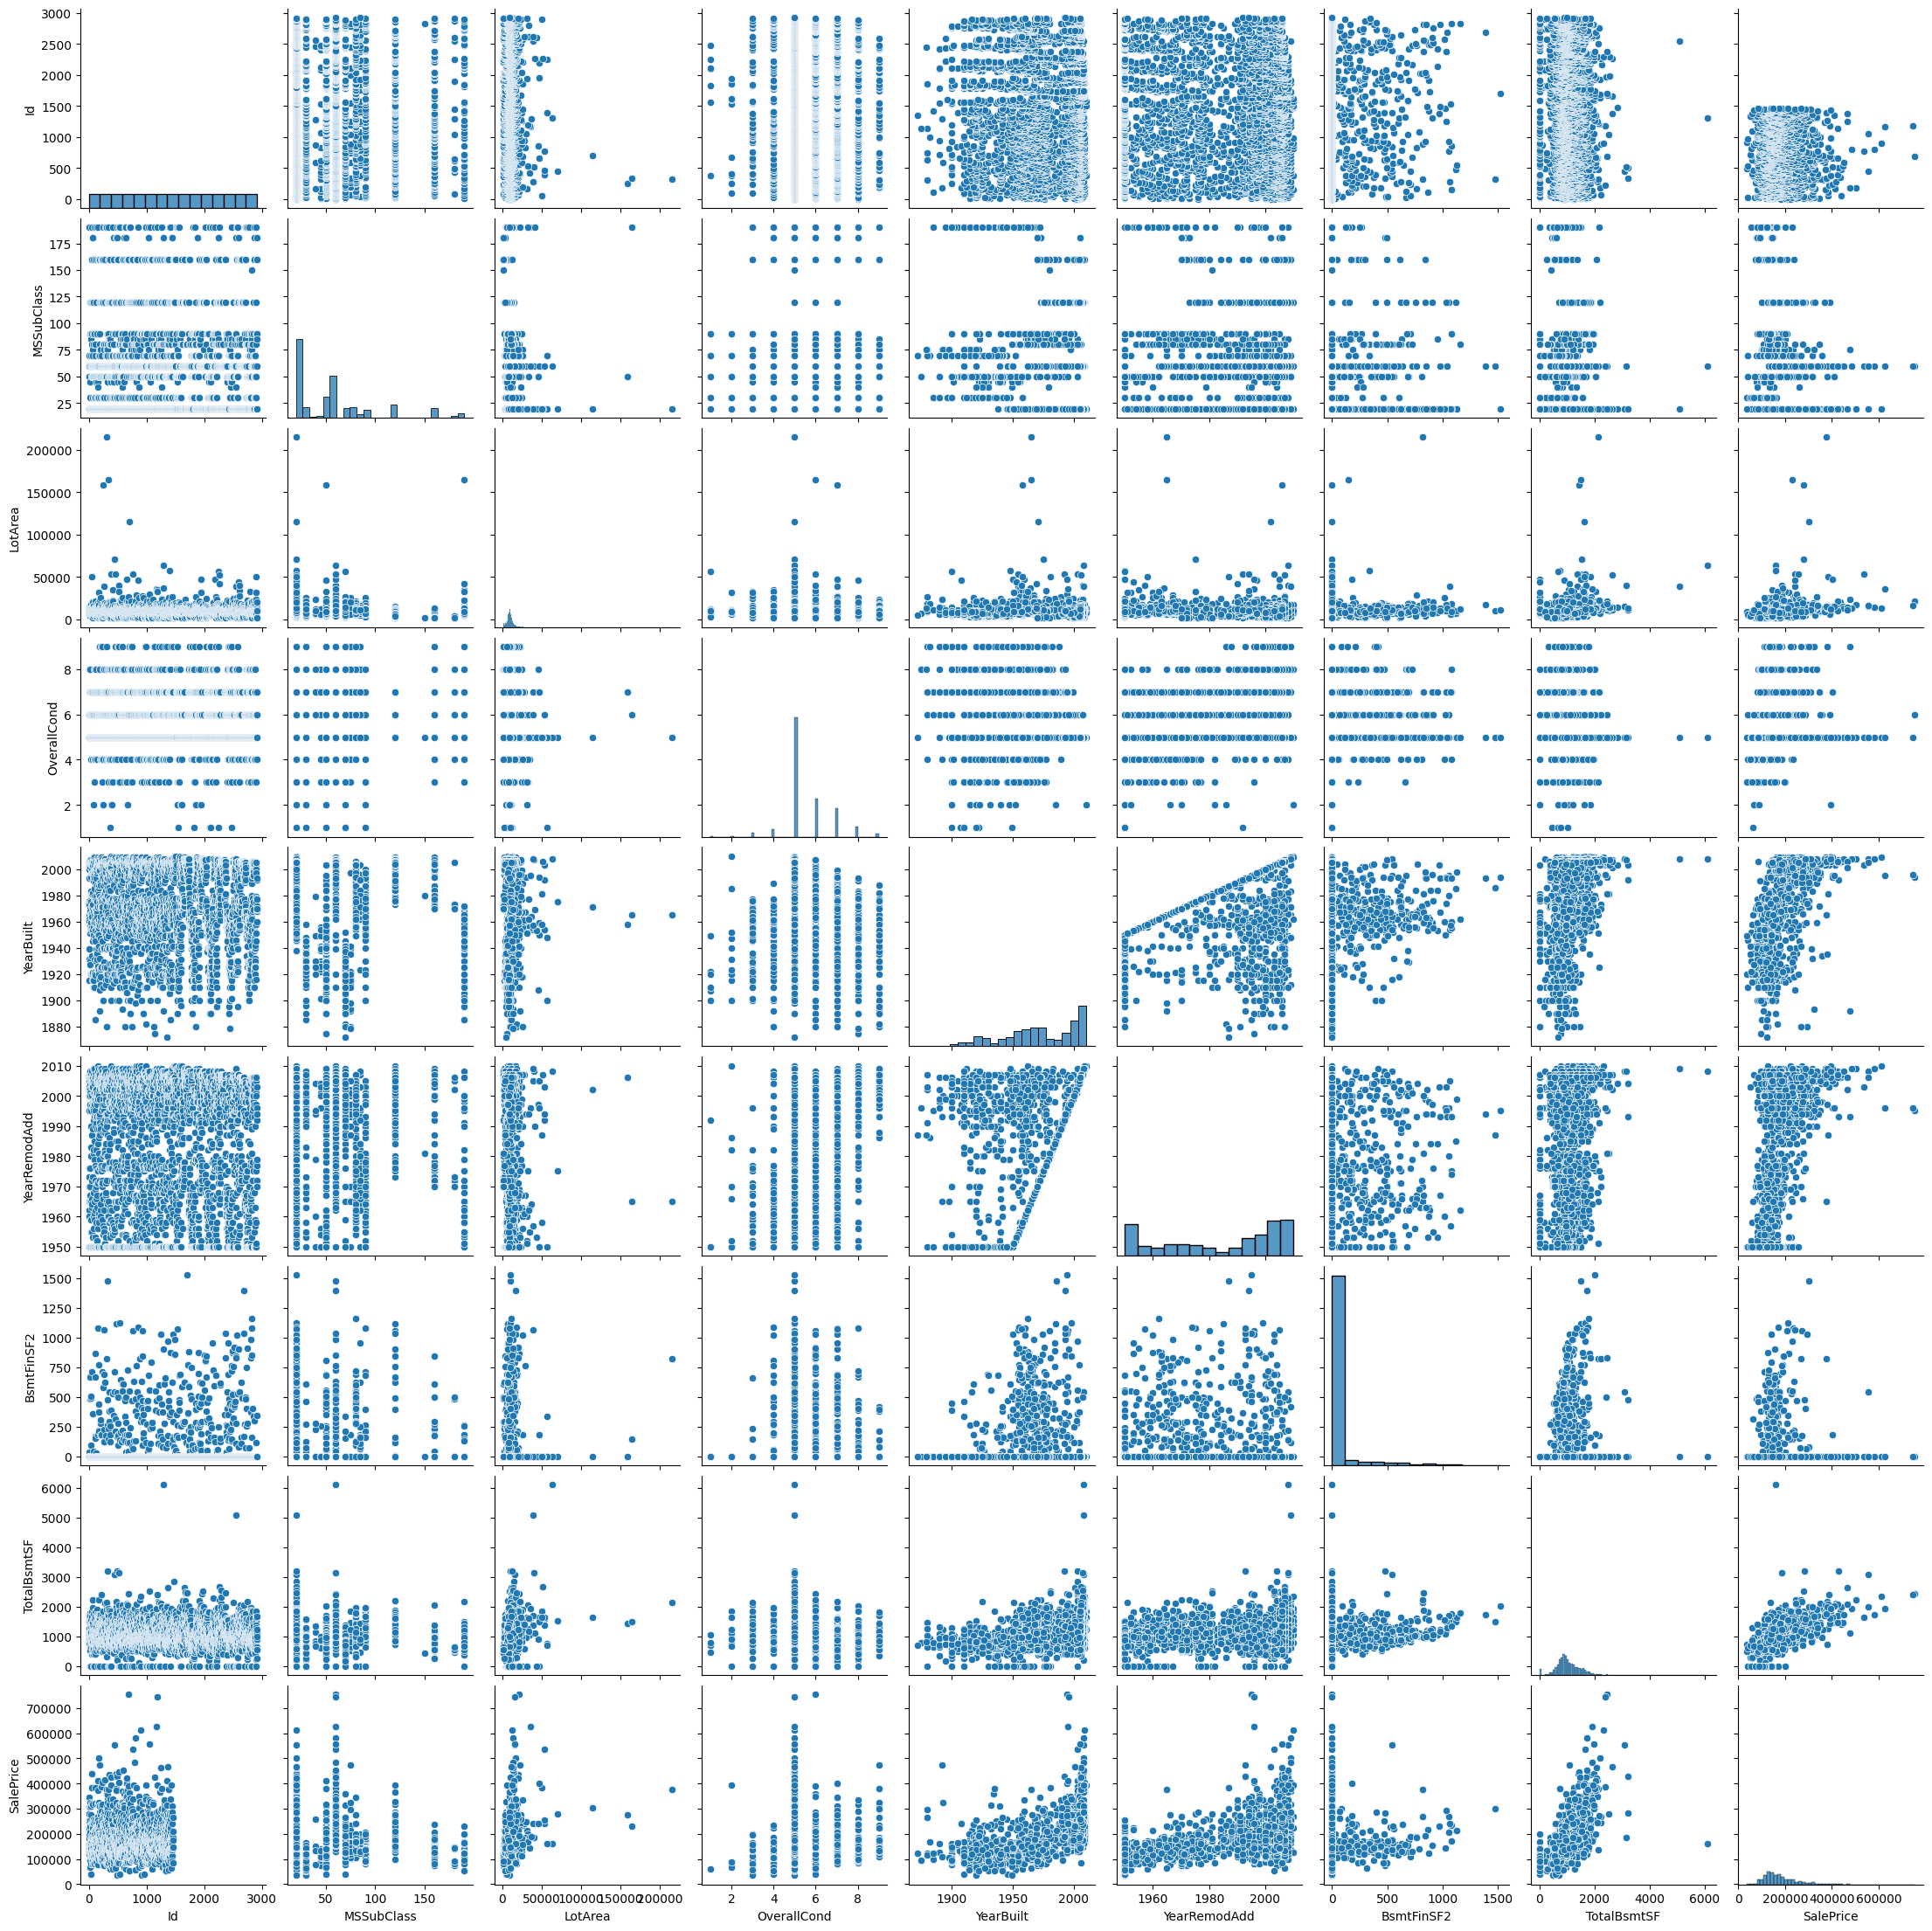

In [7]:
sns.pairplot(data)

C:\Users\vagee\AppData\Local\Temp\ipykernel_20300\3545255702.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['SalePrice'])


<Axes: xlabel='SalePrice', ylabel='Density'>

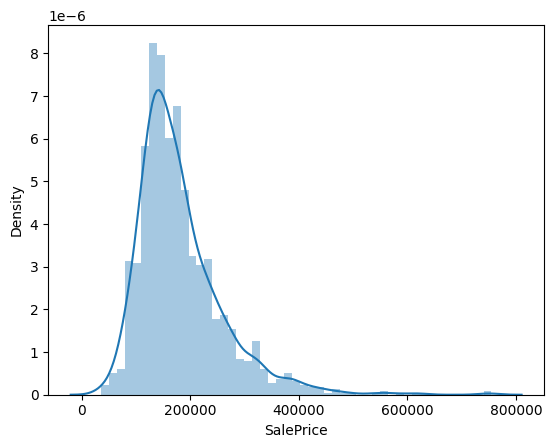

In [8]:
sns.distplot(data['SalePrice'])

Check for missing values

In [9]:
data.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           4
LotArea            0
LotConfig          0
BldgType           0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
Exterior1st        1
BsmtFinSF2         1
TotalBsmtSF        1
SalePrice       1459
dtype: int64

Impute missing values

In [10]:
num_imputer = SimpleImputer(strategy='mean')
data[data.select_dtypes(include=[np.number]).columns] = num_imputer.fit_transform(data.select_dtypes(include=[np.number]))


In [11]:
cat_imputer = SimpleImputer(strategy='most_frequent')
data[data.select_dtypes(include=[object]).columns] = cat_imputer.fit_transform(data.select_dtypes(include=[object]))

Select features and target variable

In [12]:
X = data.drop('SalePrice', axis=1)  
y = data['SalePrice']        

encoding an remaing categorical variables by# One-hot

In [13]:
X = pd.get_dummies(X, drop_first=True)

now we train and split data 
train 70% data 
test 30% data

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


now we are checking    for missing  valu  of xtrain and y train

In [15]:
X_train.isnull().sum().sum()
y_train.isnull().sum()


np.int64(0)

her  is one remanig  data  np.int64(0)  now 

In [16]:
if X_train.isnull().sum().sum() > 0:
    X_train[num_imputer.fit(X_train.select_dtypes(include=[np.number]).columns)] = num_imputer.transform(X_train.select_dtypes(include=[np.number]))
    X_train[cat_imputer.fit(X_train.select_dtypes(include=[object]).columns)] = cat_imputer.transform(X_train.select_dtypes(include=[object]))


final check  of dataset  befor fiting the module

In [17]:
'''X_train.isnull().sum().sum()
y_train.isnull().sum()'''

'X_train.isnull().sum().sum()\ny_train.isnull().sum()'

Fit the model no missing values

In [18]:

if X_train.isnull().sum().sum() == 0 and y_train.isnull().sum() == 0:
    model = LinearRegression()
    model.fit(X_train, y_train)
    print("Model fitted successfully.")
else:
    print("Cannot fit the model due to missing values.")
    

Model fitted successfully.


Predictions from our Linear Regression Model


In [19]:
predictions = model.predict(X_test)

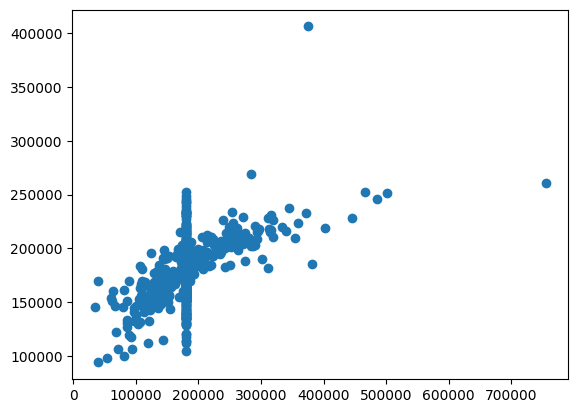

In [20]:

plt.scatter(y_test,predictions)


In the above scatter plot, we see data is in line shape, which means our model has done good predictions

C:\Users\vagee\AppData\Local\Temp\ipykernel_20300\1326397652.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_test-predictions),bins=50);


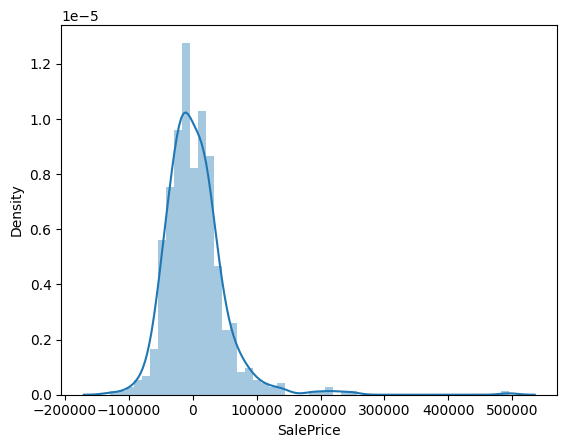

In [21]:
sns.distplot((y_test-predictions),bins=50);

In [22]:
from sklearn import metrics

In [23]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print('R-squared (R²):',r2_score(y_test,predictions))

MAE: 32644.84768356397
MSE: 2368595623.623368
RMSE: 48668.219852624236
R-squared (R²): 0.3359158621808874


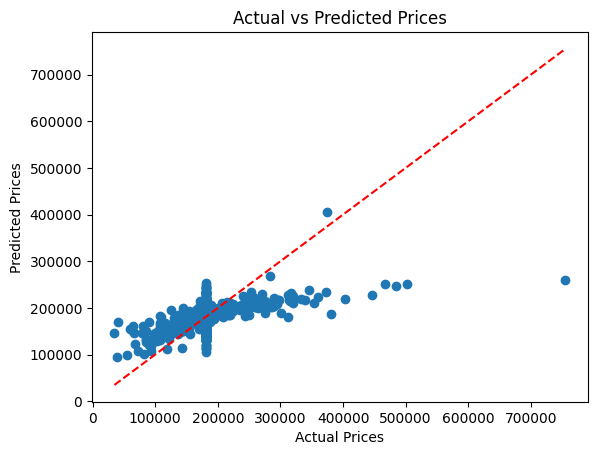

In [24]:
plt.scatter(y_test, predictions)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Prices")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')  # Line of perfect prediction
plt.show()